Обучение с учителем

Задание 2

In [1]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [8]:
target = boston["target"]
target[:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [10]:
data = boston["data"]
data.shape

(506L, 13L)

In [11]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
forest=RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [16]:
forest.fit(X_train, y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
y_pred = forest.predict(X_test)

y_pred.shape

(152L,)

In [19]:
print("Прогнозы для тестового набора:\n{}".format(y_pred[:10]))

Прогнозы для тестового набора:
[ 22.84002541  31.15381352  16.22562922  23.82103598  17.16004837
  21.84094398  19.90118201  14.64255036  21.23732834  20.88314511]


In [21]:
print("R^2 на тестовом наборе:{:.2f}".format(forest.score(X_test, y_test)))

R^2 на тестовом наборе:0.88


In [22]:
print("R^2 на обучающем наборе:{:.2f}".format(forest.score(X_train, y_train)))

R^2 на обучающем наборе:0.98


на тестовом и обучающем наборах модель на RandomForestRegressor работает лучше.

Задание 3

In [23]:
dir(RandomForestRegressor)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_params',
 'predict',
 'score',
 'set_params']

In [25]:
print(RandomForestRegressor.feature_importances_.__doc__)

Return the feature importances (the higher, the more important the
           feature).

        Returns
        -------
        feature_importances_ : array, shape = [n_features]
        


In [26]:
print("Важности признаков:\n{}".format(forest.feature_importances_))

Важности признаков:
[ 0.03041796  0.00153287  0.00705227  0.00117158  0.01463026  0.40245231
  0.01427184  0.06457307  0.00515197  0.01203962  0.01819018  0.01256251
  0.41595357]


In [35]:
msv = pd.Series(forest.feature_importances_, index=boston["feature_names"])
msv

CRIM       0.030418
ZN         0.001533
INDUS      0.007052
CHAS       0.001172
NOX        0.014630
RM         0.402452
AGE        0.014272
DIS        0.064573
RAD        0.005152
TAX        0.012040
PTRATIO    0.018190
B          0.012563
LSTAT      0.415954
dtype: float64

In [29]:
from matplotlib import pyplot as plt

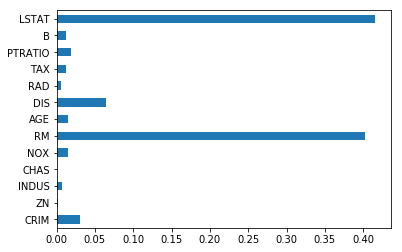

In [34]:
msv.plot(kind="barh")

plt.show()

Признаки LSTAT и RM имеют наибольшую важность